In [15]:
import pandas as pd
import os
import numpy as np
import scipy
import matplotlib.pyplot as plt
# import sklearn

def read_data(filepath, columns):
    d = pd.read_csv(filepath, header=0, names=columns)
    return d

def q5_parta(filepath="DATAT/2016.csv"):
    d = read_data(filepath, ['Rk','Team','G','MP','FG','FGA','FG%','3P','3PA','3P%','2P','2PA','2P%','FT','FTA','FT%','ORB','DRB','TRB','AST','STL','BLK','TOV','PF','PTS'])
    FG = d['FG%']
    TRB = d['TRB']
    PTS = d['PTS']
    TRB = TRB[:-1]
    FG = FG[:-1]
    PTS = PTS[:-1]

    X = np.zeros((len(FG),2))
    X[:,0] = FG[:]
    X[:,1] = TRB[:] 
    # X = np.hstack((np.array(FG),np.array(TRB)))
    Y = np.zeros((len(PTS),1))
    Y[:,0] = PTS[:] 


    # print(X)
    # print(Y)

    # print(X.shape)
    # print(Y.shape)
    beta = np.matmul(np.linalg.inv(np.matmul(np.matrix.transpose(X),X)), np.matmul(np.matrix.transpose(X), Y))
    print beta
    return beta

def q5_partb():
    d = read_data("DATAT/2016.csv", ['Rk','Team','G','MP','FG','FGA','FG%','3P','3PA','3P%','2P','2PA','2P%','FT','FTA','FT%','ORB','DRB','TRB','AST','STL','BLK','TOV','PF','PTS'])
    FG = d['FG%']
    TRB = d['TRB']
    PTS = d['PTS']
    ORB = d['ORB']
    DRB = d['DRB']

    TRB = TRB[:-1]
    FG = FG[:-1]
    PTS = PTS[:-1]
    ORB = ORB[:-1]
    DRB = DRB[:-1]

    X = np.zeros((len(FG),4))
    X[:,0] = FG[:]
    X[:,1] = TRB[:] 
    X[:,2] = ORB[:]
    X[:,3] = DRB[:]
    # X = np.hstack((np.array(FG),np.array(TRB)))
    Y = np.zeros((len(PTS),1))
    Y[:,0] = PTS[:] 


    # print(X)
    # print(Y)

    # print(X.shape)
    # print(Y.shape)
    beta = np.matmul(np.linalg.inv(np.matmul(np.matrix.transpose(X),X)), np.matmul(np.matrix.transpose(X), Y))
    print beta
    return beta


def computeSSE(Y, Y_pred):
    error = np.matmul(np.matrix.transpose(Y-Y_pred), Y-Y_pred)
    sum_error = np.sum(error)
    return sum_error

def computeMAPE(Y, Y_pred):
    mape = 0
    for i in range(Y.shape[0]):
        mape = mape + abs(Y[i,0] - Y_pred[i,0])/Y[i,0]
    mape = mape*(100/Y.shape[0])
    return mape

def q5_parta_beta0(filepath="DATAT/2016.csv"):
    d = read_data(filepath, ['Rk','Team','G','MP','FG','FGA','FG%','3P','3PA','3P%','2P','2PA','2P%','FT','FTA','FT%','ORB','DRB','TRB','AST','STL','BLK','TOV','PF','PTS'])
    FG = d['FG%']
    TRB = d['TRB']
    PTS = d['PTS']
    TRB = TRB[:-1]
    FG = FG[:-1]
    PTS = PTS[:-1]
    O = np.ones((len(FG),1))

    X = np.zeros((len(FG),3))
    X[:,0] = list(O)[:]
    X[:,1] = FG[:]
    X[:,2] = TRB[:] 

    # X = np.hstack((np.array(FG),np.array(TRB)))
    Y = np.zeros((len(PTS),1))
    Y[:,0] = PTS[:] 


    # print(X)
    # print(Y)

    # print(X.shape)
    # print(Y.shape)
    beta = np.matmul(np.linalg.inv(np.matmul(np.matrix.transpose(X),X)), np.matmul(np.matrix.transpose(X), Y))
    print beta
    return beta

def q5_partc(filepath1, filepath2):
    beta = q5_parta_beta0(filepath1)

    d = read_data(filepath2, ['Rk','Team','G','MP','FG','FGA','FG%','3P','3PA','3P%','2P','2PA','2P%','FT','FTA','FT%','ORB','DRB','TRB','AST','STL','BLK','TOV','PF','PTS'])
    FG = d['FG%']
    TRB = d['TRB']
    PTS = d['PTS']
    TRB = TRB[:-1]
    FG = FG[:-1]
    PTS = PTS[:-1]
    O = np.ones((len(FG),1))

    X = np.zeros((len(FG),3))
    X[:,0] = list(O)[:]
    X[:,1] = FG[:]
    X[:,2] = TRB[:]
    Y = np.zeros((len(PTS),1))
    Y[:,0] = PTS[:]

    beta_array = np.ones((len(beta),1))
    beta_array = beta[:]
    Y_pred = np.matmul(X, beta_array)

    print(Y)
    print("")
    print(Y_pred)

    assert Y_pred.shape[0] == Y.shape[0]
    sse = computeSSE(Y, Y_pred)
    mape = computeMAPE(Y, Y_pred)

    return sse, mape, Y, Y_pred

def plotfig(X, Y, x_label, y_label):
#     plt.plot(X, Y, color='orange', linestyle='solid')
    plt.scatter(X, Y)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.show()

def q5_partd(filepath1, filepath2):
    sse, mape, Y, Y_pred = q5_partc(filepath1, filepath2)
    print("sse = " + str(sse))
    print("mape = " + str(mape))
    epsilon = Y-Y_pred
    plotfig(np.array(Y_pred), np.array(epsilon),'Y_pred','residuals')

def findFnHat(inputs):
    fnHat = []
    for i in inputs:
        count = 0
        for j in inputs:
            if j<i:
                count+=1
        fnHat.append(float(count)/len(inputs))
    return fnHat

def findPnHat(inputs):
    fnHat = []
    for i in inputs:
        count = 0
        for j in inputs:
            if j==i:
                count+=1
        fnHat.append(float(count)/len(inputs))
    return fnHat

def q5_parte(filepath1, filepath2):
    sse, mape, Y, Y_pred = q5_partc(filepath1, filepath2)
    print("sse = " + str(sse))
    print("mape = " + str(mape))
    epsilon = Y-Y_pred
    # fnhat = findFnHat(epsilon)
    # pnhat = findPnHat(epsilon)
    # plotfig(np.array(epsilon), np.array(fnhat),'residuals','fnhat')
    plt.hist(epsilon)
    plt.xlabel('epsilon')
    plt.ylabel('probability')
    plt.show()
    # plotfig(np.array(epsilon), np.array(pnhat),'residuals','pnhat')


In [16]:
q5_parta()

[[129.63595432]
 [  1.00665119]]


array([[129.63595432],
       [  1.00665119]])

In [17]:
q5_partb()

[[120.34948156]
 [ -0.2560834 ]
 [  0.98249996]
 [  1.47555233]]


array([[120.34948156],
       [ -0.2560834 ],
       [  0.98249996],
       [  1.47555233]])

In [18]:
sse, mape, Y, Y_pred = q5_partc("DATAT/2016.csv", "DATAT/2017.csv")
print("sse = " + str(sse))
print("mape = " + str(mape))

[[  1.27131398]
 [128.05327461]
 [  0.99397322]]
[[115.9]
 [115.3]
 [111.7]
 [110.3]
 [109.2]
 [108.7]
 [108. ]
 [107.9]
 [107.7]
 [106.9]
 [106.6]
 [105.8]
 [105.6]
 [105.3]
 [105.1]
 [104.9]
 [104.6]
 [104.3]
 [104.3]
 [103.6]
 [103.2]
 [103.2]
 [102.9]
 [102.8]
 [102.4]
 [101.3]
 [101.1]
 [100.7]
 [100.5]
 [ 97.9]]

[[108.79009608]
 [104.56433802]
 [107.44865739]
 [104.89298296]
 [104.73807075]
 [104.83746808]
 [101.15437608]
 [103.48439694]
 [103.62408266]
 [103.72707402]
 [105.47054637]
 [101.76239247]
 [103.21665794]
 [104.96372433]
 [102.56296211]
 [101.20809395]
 [102.13312282]
 [102.33191747]
 [103.43871748]
 [102.12508442]
 [102.87278652]
 [103.05635468]
 [104.1479282 ]
 [101.1561731 ]
 [100.41291537]
 [104.19181064]
 [100.55439811]
 [103.88378325]
 [ 99.51654245]
 [ 95.98212128]]
sse = 429.07552411944584
mape = 2.506771159537379


In [14]:
sse, mape, Y, Y_pred = q5_partc("DATAT/2015_2016.csv", "DATAT/2017.csv")
print("sse = " + str(sse))
print("mape = " + str(mape))

[[-17.66036268]
 [168.08926021]
 [  0.99382032]]
[[115.9]
 [115.3]
 [111.7]
 [110.3]
 [109.2]
 [108.7]
 [108. ]
 [107.9]
 [107.7]
 [106.9]
 [106.6]
 [105.8]
 [105.6]
 [105.3]
 [105.1]
 [104.9]
 [104.6]
 [104.3]
 [104.3]
 [103.6]
 [103.2]
 [103.2]
 [102.9]
 [102.8]
 [102.4]
 [101.3]
 [101.1]
 [100.7]
 [100.5]
 [ 97.9]]

[[109.6694432 ]
 [104.12249761]
 [107.28676306]
 [104.77153747]
 [104.81692752]
 [104.91630955]
 [100.39261477]
 [102.92255561]
 [102.70171868]
 [103.36547378]
 [104.6280097 ]
 [100.59998077]
 [102.97530328]
 [104.80221227]
 [102.24159663]
 [ 99.96565615]
 [101.2109882 ]
 [101.40975226]
 [102.39621496]
 [102.16428746]
 [102.15081653]
 [102.17413372]
 [102.98514953]
 [100.6748013 ]
 [ 99.1705999 ]
 [103.22930364]
 [ 99.2319495 ]
 [103.60227027]
 [ 97.99397508]
 [ 94.66037605]]
sse = 513.0723942716204
mape = 2.917574208837878


In [19]:
sse, mape, Y, Y_pred = q5_partc("DATAT/2010_2016.csv", "DATAT/2017.csv")
print("sse = " + str(sse))
print("mape = " + str(mape))

[[-22.55647938]
 [176.96157596]
 [  0.98743059]]
[[115.9]
 [115.3]
 [111.7]
 [110.3]
 [109.2]
 [108.7]
 [108. ]
 [107.9]
 [107.7]
 [106.9]
 [106.6]
 [105.8]
 [105.6]
 [105.3]
 [105.1]
 [104.9]
 [104.6]
 [104.3]
 [104.3]
 [103.6]
 [103.2]
 [103.2]
 [102.9]
 [102.8]
 [102.4]
 [101.3]
 [101.1]
 [100.7]
 [100.5]
 [ 97.9]]

[[108.88141913]
 [103.04168712]
 [106.25527934]
 [103.76617831]
 [103.86104172]
 [103.95978478]
 [ 99.25616109]
 [101.81960098]
 [101.51060657]
 [102.30943662]
 [103.44441867]
 [ 99.36266346]
 [101.95163381]
 [103.78670286]
 [101.20273842]
 [ 98.71251113]
 [100.02946068]
 [100.22694679]
 [101.17720796]
 [101.21550365]
 [101.01301161]
 [100.99636673]
 [101.73249688]
 [ 99.60620458]
 [ 97.92256665]
 [102.02484641]
 [ 97.96361574]
 [102.56461671]
 [ 96.68383562]
 [ 93.421435  ]]
sse = 758.7425010630864
mape = 3.7359376456207123


[[  1.27131398]
 [128.05327461]
 [  0.99397322]]
[[115.9]
 [115.3]
 [111.7]
 [110.3]
 [109.2]
 [108.7]
 [108. ]
 [107.9]
 [107.7]
 [106.9]
 [106.6]
 [105.8]
 [105.6]
 [105.3]
 [105.1]
 [104.9]
 [104.6]
 [104.3]
 [104.3]
 [103.6]
 [103.2]
 [103.2]
 [102.9]
 [102.8]
 [102.4]
 [101.3]
 [101.1]
 [100.7]
 [100.5]
 [ 97.9]]

[[108.79009608]
 [104.56433802]
 [107.44865739]
 [104.89298296]
 [104.73807075]
 [104.83746808]
 [101.15437608]
 [103.48439694]
 [103.62408266]
 [103.72707402]
 [105.47054637]
 [101.76239247]
 [103.21665794]
 [104.96372433]
 [102.56296211]
 [101.20809395]
 [102.13312282]
 [102.33191747]
 [103.43871748]
 [102.12508442]
 [102.87278652]
 [103.05635468]
 [104.1479282 ]
 [101.1561731 ]
 [100.41291537]
 [104.19181064]
 [100.55439811]
 [103.88378325]
 [ 99.51654245]
 [ 95.98212128]]
sse = 429.07552411944584
mape = 2.506771159537379


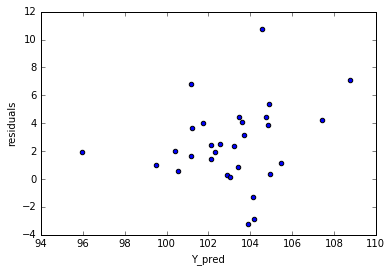

In [20]:
q5_partd("DATAT/2016.csv", "DATAT/2017.csv")

[[-17.66036268]
 [168.08926021]
 [  0.99382032]]
[[115.9]
 [115.3]
 [111.7]
 [110.3]
 [109.2]
 [108.7]
 [108. ]
 [107.9]
 [107.7]
 [106.9]
 [106.6]
 [105.8]
 [105.6]
 [105.3]
 [105.1]
 [104.9]
 [104.6]
 [104.3]
 [104.3]
 [103.6]
 [103.2]
 [103.2]
 [102.9]
 [102.8]
 [102.4]
 [101.3]
 [101.1]
 [100.7]
 [100.5]
 [ 97.9]]

[[109.6694432 ]
 [104.12249761]
 [107.28676306]
 [104.77153747]
 [104.81692752]
 [104.91630955]
 [100.39261477]
 [102.92255561]
 [102.70171868]
 [103.36547378]
 [104.6280097 ]
 [100.59998077]
 [102.97530328]
 [104.80221227]
 [102.24159663]
 [ 99.96565615]
 [101.2109882 ]
 [101.40975226]
 [102.39621496]
 [102.16428746]
 [102.15081653]
 [102.17413372]
 [102.98514953]
 [100.6748013 ]
 [ 99.1705999 ]
 [103.22930364]
 [ 99.2319495 ]
 [103.60227027]
 [ 97.99397508]
 [ 94.66037605]]
sse = 513.0723942716204
mape = 2.917574208837878


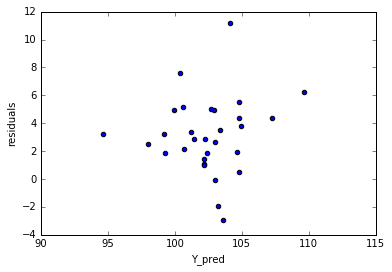

In [21]:
q5_partd("DATAT/2015_2016.csv", "DATAT/2017.csv")

[[-22.55647938]
 [176.96157596]
 [  0.98743059]]
[[115.9]
 [115.3]
 [111.7]
 [110.3]
 [109.2]
 [108.7]
 [108. ]
 [107.9]
 [107.7]
 [106.9]
 [106.6]
 [105.8]
 [105.6]
 [105.3]
 [105.1]
 [104.9]
 [104.6]
 [104.3]
 [104.3]
 [103.6]
 [103.2]
 [103.2]
 [102.9]
 [102.8]
 [102.4]
 [101.3]
 [101.1]
 [100.7]
 [100.5]
 [ 97.9]]

[[108.88141913]
 [103.04168712]
 [106.25527934]
 [103.76617831]
 [103.86104172]
 [103.95978478]
 [ 99.25616109]
 [101.81960098]
 [101.51060657]
 [102.30943662]
 [103.44441867]
 [ 99.36266346]
 [101.95163381]
 [103.78670286]
 [101.20273842]
 [ 98.71251113]
 [100.02946068]
 [100.22694679]
 [101.17720796]
 [101.21550365]
 [101.01301161]
 [100.99636673]
 [101.73249688]
 [ 99.60620458]
 [ 97.92256665]
 [102.02484641]
 [ 97.96361574]
 [102.56461671]
 [ 96.68383562]
 [ 93.421435  ]]
sse = 758.7425010630864
mape = 3.7359376456207123


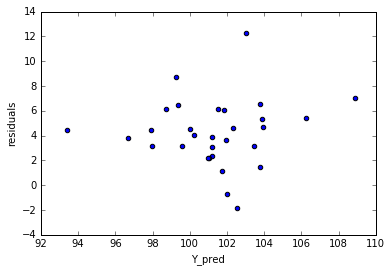

In [22]:
q5_partd("DATAT/2010_2016.csv", "DATAT/2017.csv")

[[  1.27131398]
 [128.05327461]
 [  0.99397322]]
[[115.9]
 [115.3]
 [111.7]
 [110.3]
 [109.2]
 [108.7]
 [108. ]
 [107.9]
 [107.7]
 [106.9]
 [106.6]
 [105.8]
 [105.6]
 [105.3]
 [105.1]
 [104.9]
 [104.6]
 [104.3]
 [104.3]
 [103.6]
 [103.2]
 [103.2]
 [102.9]
 [102.8]
 [102.4]
 [101.3]
 [101.1]
 [100.7]
 [100.5]
 [ 97.9]]

[[108.79009608]
 [104.56433802]
 [107.44865739]
 [104.89298296]
 [104.73807075]
 [104.83746808]
 [101.15437608]
 [103.48439694]
 [103.62408266]
 [103.72707402]
 [105.47054637]
 [101.76239247]
 [103.21665794]
 [104.96372433]
 [102.56296211]
 [101.20809395]
 [102.13312282]
 [102.33191747]
 [103.43871748]
 [102.12508442]
 [102.87278652]
 [103.05635468]
 [104.1479282 ]
 [101.1561731 ]
 [100.41291537]
 [104.19181064]
 [100.55439811]
 [103.88378325]
 [ 99.51654245]
 [ 95.98212128]]
sse = 429.07552411944584
mape = 2.506771159537379


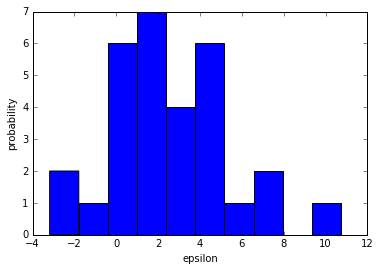

In [23]:
q5_parte("DATAT/2016.csv", "DATAT/2017.csv")

[[-17.66036268]
 [168.08926021]
 [  0.99382032]]
[[115.9]
 [115.3]
 [111.7]
 [110.3]
 [109.2]
 [108.7]
 [108. ]
 [107.9]
 [107.7]
 [106.9]
 [106.6]
 [105.8]
 [105.6]
 [105.3]
 [105.1]
 [104.9]
 [104.6]
 [104.3]
 [104.3]
 [103.6]
 [103.2]
 [103.2]
 [102.9]
 [102.8]
 [102.4]
 [101.3]
 [101.1]
 [100.7]
 [100.5]
 [ 97.9]]

[[109.6694432 ]
 [104.12249761]
 [107.28676306]
 [104.77153747]
 [104.81692752]
 [104.91630955]
 [100.39261477]
 [102.92255561]
 [102.70171868]
 [103.36547378]
 [104.6280097 ]
 [100.59998077]
 [102.97530328]
 [104.80221227]
 [102.24159663]
 [ 99.96565615]
 [101.2109882 ]
 [101.40975226]
 [102.39621496]
 [102.16428746]
 [102.15081653]
 [102.17413372]
 [102.98514953]
 [100.6748013 ]
 [ 99.1705999 ]
 [103.22930364]
 [ 99.2319495 ]
 [103.60227027]
 [ 97.99397508]
 [ 94.66037605]]
sse = 513.0723942716204
mape = 2.917574208837878


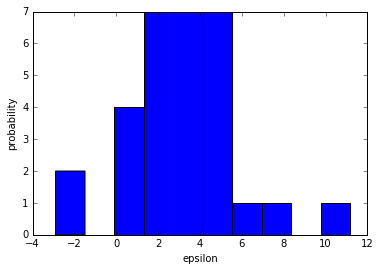

In [25]:
q5_parte("DATAT/2015_2016.csv", "DATAT/2017.csv")

[[-22.55647938]
 [176.96157596]
 [  0.98743059]]
[[115.9]
 [115.3]
 [111.7]
 [110.3]
 [109.2]
 [108.7]
 [108. ]
 [107.9]
 [107.7]
 [106.9]
 [106.6]
 [105.8]
 [105.6]
 [105.3]
 [105.1]
 [104.9]
 [104.6]
 [104.3]
 [104.3]
 [103.6]
 [103.2]
 [103.2]
 [102.9]
 [102.8]
 [102.4]
 [101.3]
 [101.1]
 [100.7]
 [100.5]
 [ 97.9]]

[[108.88141913]
 [103.04168712]
 [106.25527934]
 [103.76617831]
 [103.86104172]
 [103.95978478]
 [ 99.25616109]
 [101.81960098]
 [101.51060657]
 [102.30943662]
 [103.44441867]
 [ 99.36266346]
 [101.95163381]
 [103.78670286]
 [101.20273842]
 [ 98.71251113]
 [100.02946068]
 [100.22694679]
 [101.17720796]
 [101.21550365]
 [101.01301161]
 [100.99636673]
 [101.73249688]
 [ 99.60620458]
 [ 97.92256665]
 [102.02484641]
 [ 97.96361574]
 [102.56461671]
 [ 96.68383562]
 [ 93.421435  ]]
sse = 758.7425010630864
mape = 3.7359376456207123


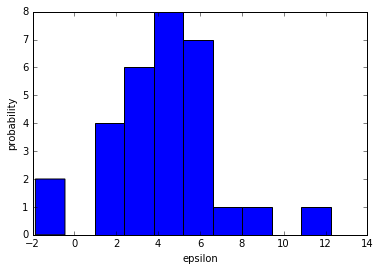

In [26]:
q5_parte("DATAT/2010_2016.csv", "DATAT/2017.csv")